In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

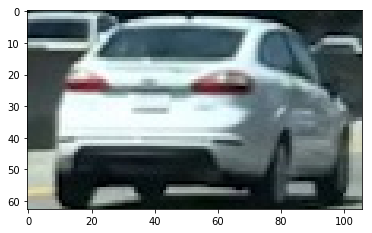

In [40]:
image=mpimg.imread("../img/code/templates/cutout1.jpg")
plt.imshow(image)

I can construct histograms of the R, G, and B channels like this:

In [41]:
rhis=np.histogram(image[:,:,0],bins=32,range=(0,256))
ghis=np.histogram(image[:,:,1],bins=32,range=(0,256))
bhis=np.histogram(image[:,:,2],bins=32,range=(0,256))

With np.histogram(), I don't actually have to specify the number of bins or the range, but here I've arbitrarily chosen 32 bins and specified range=(0, 256) in order to get orderly bin sizes. np.histogram() returns a tuple of two arrays. In this case, for example, rhist[0] contains the counts in each of the bins and rhist[1] contains the bin edges (so it is one element longer than rhist[0]).

To look at a plot of these results, I can compute the bin centers from the bin edges. Each of the histograms in this case have the same bins, so I'll just use the rhist bin edges:

In [42]:
bin_edges = rhis[1]
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

In [43]:
bin_centers

array([  4.,  12.,  20.,  28.,  36.,  44.,  52.,  60.,  68.,  76.,  84.,
        92., 100., 108., 116., 124., 132., 140., 148., 156., 164., 172.,
       180., 188., 196., 204., 212., 220., 228., 236., 244., 252.])

And then plotting up the results in a bar chart:

Text(0.5,1,'B Histogram')

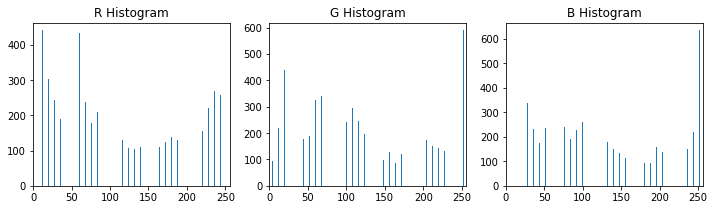

In [44]:
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar( bin_centers, rhis[0])
plt.xlim(0, 256)
plt.title('R Histogram')


plt.subplot(132)
plt.bar(bin_centers, ghis[0])
plt.xlim(0, 256)
plt.title('G Histogram')

plt.subplot(133)
plt.bar(bin_centers, bhis[0])
plt.xlim(0, 256)
plt.title('B Histogram')


To get feature vector for this particular cutout image i can concatenate them in the following way:

In [45]:
hist_features = np.concatenate((rhis[0], ghis[0], bhis[0]))

In [46]:
hist_features

array([400, 441, 302, 244, 189, 283, 412, 433, 239, 177, 209, 302, 276,
       179, 129, 106, 104, 111, 106,  96, 111, 123, 139, 130, 167, 164,
       149, 156, 222, 268, 258,  53,  95, 219, 441, 331, 235, 179, 188,
       324, 340, 321, 252, 215, 242, 296, 244, 198, 133, 117,  98, 127,
        88, 120, 104,  88, 117, 172, 152, 142, 133, 159, 219, 589, 106,
       206, 367, 337, 230, 174, 235, 328, 316, 238, 189, 227, 261, 271,
       291, 244, 179, 148, 134, 112, 129, 123,  94,  93, 160, 138, 117,
       110, 121, 148, 219, 633], dtype=int64)

Having a function that does all these steps might be useful for the project so for this next exercise, my goal is to write a function that takes an image and computes the RGB color histogram of features given a particular number of bins and pixels intensity range, and returns the concatenated RGB feature vector, like this:

In [75]:
def color_hist(img,nbins=32,bins_range=(0,256)):
    rhist=None
    ghist=None
    bhis=None
    
    rhist=np.histogram(img[:,:,0],bins=nbins,range=bins_range)
    ghist=np.histogram(img[:,:,1],bins=nbins,range=bins_range)
    bhist=np.histogram(img[:,:,2],bins=nbins,range=bins_range)
    # Generating bin centers
    bin_centers=None
    bin_edges = rhist[1]
    bin_centers=(bin_edges[1:]+bin_edges[0:len(bin_edges)-1])/2
    
    # Concatenate the histograms into a single feature vector
    his_features=None
    his_features=np.concatenate((rhist[0],ghist[0],bhist[0]))
    
    return rhist, ghist, bhist, bin_centers, hist_features
    



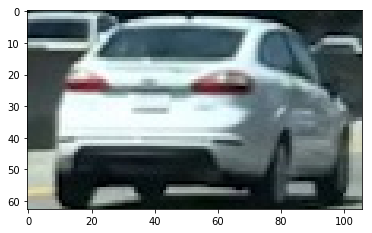

In [76]:
image=mpimg.imread("../img/code/templates/cutout1.jpg")
plt.imshow(image)

In [79]:
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))


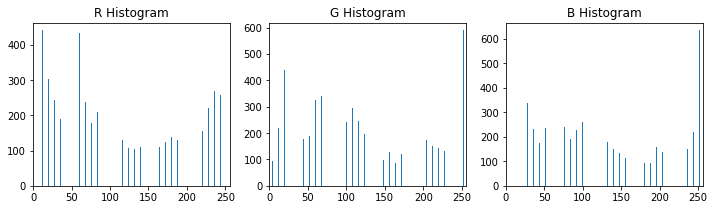

In [82]:
if rh is not None:
    fig=plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen,rh[0])
    plt.xlim(0,256)
    plt.title("R Histogram")
    
    plt.subplot(132)
    plt.bar(bincen,gh[0])
    plt.xlim(0,256)
    plt.title("G Histogram")
    
    plt.subplot(133)
    plt.bar(bincen,bh[0])
    plt.xlim(0,256)
    plt.title("B Histogram")